<a href="https://colab.research.google.com/github/np03cs4a240162-alina/W7_OODP/blob/main/Worksheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [ ]:
housing_data_path = "/kaggle/input/california-housing-prices/housing.csv"
df = pd.read_csv(housing_data_path)
df = df.dropna()

In [ ]:
#Task 1: Load and Split Dataset
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (16346, 12)
Test features shape: (4087, 12)
Training labels shape: (16346,)
Test labels shape: (4087,)


In [ ]:
#Task 2 - Step: 1 Baseline Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

                       Feature    Coefficient
9       ocean_proximity_ISLAND  213653.374463
7                median_income   39277.083020
11  ocean_proximity_NEAR OCEAN    3166.477128
2           housing_median_age    1081.364206
4               total_bedrooms     103.004042
6                   households      43.142725
3                  total_rooms      -6.322146
5                   population     -36.409751
10    ocean_proximity_NEAR BAY   -6232.416876
1                     latitude  -25657.807543
0                    longitude  -27108.746321
8       ocean_proximity_INLAND  -39240.217778


In [ ]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")

Training MSE: 4690511174.84
Test MSE: 4802173538.60
Training R²: 0.646
Test R²: 0.649


In [ ]:
#Step 2 Hyperparameter Tuning for Ridge and Lasso regression models
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

alpha_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
ridge = Ridge()

ridge_grid = GridSearchCV(ridge, alpha_grid, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)

Best Ridge alpha: {'alpha': 10}


In [ ]:
best_ridge = ridge_grid.best_estimator_

y_test_pred_ridge = best_ridge.predict(X_test_scaled)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)

print(f"Ridge Test MSE: {ridge_test_mse:.2f}")

Ridge Test MSE: 4799169185.36


In [ ]:
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, alpha_grid, cv=5, scoring="neg_mean_squared_error")
lasso_grid.fit(X_train_scaled, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)

Best Lasso alpha: {'alpha': 100}


In [ ]:
best_lasso = lasso_grid.best_estimator_

y_test_pred_lasso = best_lasso.predict(X_test_scaled)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)

print(f"Lasso Test MSE: {lasso_test_mse:.2f}")

Lasso Test MSE: 4801630680.69


In [ ]:
#Step 3 Regularization Experiments (L1 and L2)

ridge_alpha = ridge_grid.best_params_["alpha"]
lasso_alpha = lasso_grid.best_params_["alpha"]

ridge_final = Ridge(alpha=ridge_alpha)
ridge_final.fit(X_train_scaled, y_train)

lasso_final = Lasso(alpha=lasso_alpha)
lasso_final.fit(X_train_scaled, y_train)

coef_comparison = pd.DataFrame({
      "Feature": X_train.columns,
    "Ridge Coefficient": ridge_final.coef_,
    "Lasso Coefficient": lasso_final.coef_
})
print(coef_comparison)

                       Feature  Ridge Coefficient  Lasso Coefficient
0                    longitude      -53244.020320      -51459.125059
1                     latitude      -53633.952168      -51878.857592
2           housing_median_age       13609.131922       13540.805008
3                  total_rooms      -13257.046721      -11588.732400
4               total_bedrooms       42122.318053       40794.913867
5                   population      -41003.666957      -40420.490483
6                   households       16739.263802       15886.616760
7                median_income       74439.102523       74065.302494
8       ocean_proximity_INLAND      -18561.319500      -19098.830812
9       ocean_proximity_ISLAND        2900.246399        2812.287006
10    ocean_proximity_NEAR BAY       -1919.120335       -1654.694183
11  ocean_proximity_NEAR OCEAN        1128.824631        1167.657011


In [ ]:
ridge_train_pred = ridge_final.predict(X_train_scaled)
ridge_test_pred = ridge_final.predict(X_test_scaled)

lasso_train_pred = lasso_final.predict(X_train_scaled)
lasso_test_pred = lasso_final.predict(X_test_scaled)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("Ridge Train MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)

print("Lasso Train MSE:", lasso_train_mse)
print("Ridge Test MSE:", lasso_test_mse)

Ridge Train MSE: 4690611287.657703
Ridge Test MSE: 4799169185.364945
Lasso Train MSE: 4691633517.3126745
Ridge Test MSE: 4801630680.689975


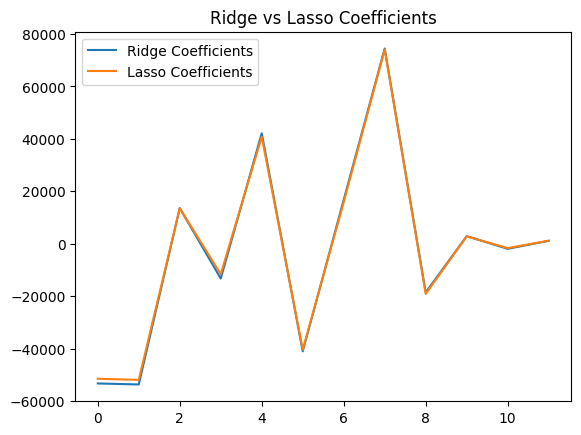

In [ ]:
plt.figure()
plt.plot(ridge_final.coef_, label="Ridge Coefficients")
plt.plot(lasso_final.coef_, label="Lasso Coefficients")
plt.legend()
plt.title("Ridge vs Lasso Coefficients")
plt.show()


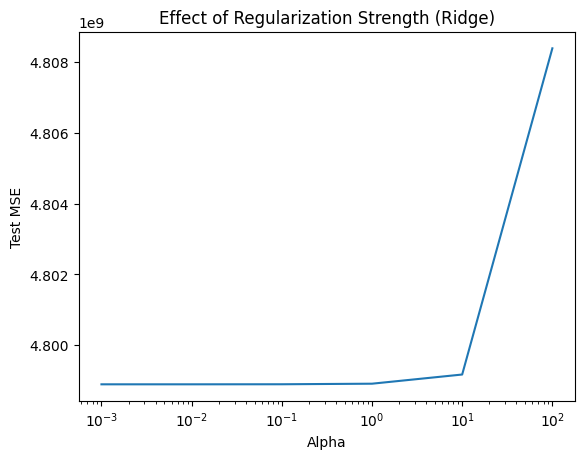

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_errors = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    ridge_errors.append(mean_squared_error(y_test, preds))

plt.figure()
plt.plot(alphas, ridge_errors)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Test MSE")
plt.title("Effect of Regularization Strength (Ridge)")
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
#Part 2: Classification Task (Breast Cancer)

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (455, 30)
Test features shape: (114, 30)
Training labels shape: (455,)
Test labels shape: (114,)


In [ ]:
#Baseline Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

                    Feature  Coefficient
11            texture error     1.103342
0               mean radius     0.807082
1              mean texture     0.113289
20             worst radius     0.095215
12          perimeter error     0.085646
15        compactness error     0.059117
3                 mean area     0.025215
19  fractal dimension error     0.013709
23               worst area    -0.014595
16          concavity error    -0.021393
14         smoothness error    -0.022318
9    mean fractal dimension    -0.031169
17     concave points error    -0.035404
18           symmetry error    -0.040393
10             radius error    -0.055117
22          worst perimeter    -0.087812
29  worst fractal dimension    -0.091561
13               area error    -0.095959
4           mean smoothness    -0.167338
5          mean compactness    -0.202176
7       mean concave points    -0.252438
2            mean perimeter    -0.283077
8             mean symmetry    -0.309213
24         worst

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 95.60%
Test Accuracy: 96.49%


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
param_grid = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"], "solver": ["liblinear"]}

logreg = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
best_logreg = grid_search.best_estimator_

y_test_pred = best_logreg.predict(X_test_scaled)
y_train_pred = best_logreg.predict(X_train_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Training Accuracy: 98.90%
Test Accuracy: 98.25%


In [ ]:
best_params = pd.DataFrame(grid_search.cv_results_)

best_l1_C = grid_search.best_params_["C"] if grid_search.best_params_["penalty"] == "l1" else None
best_l2_C = grid_search.best_params_["C"] if grid_search.best_params_["penalty"] == "l2" else None

In [ ]:
logreg_l1 = LogisticRegression(penalty="l1", C=grid_search.best_params_["C"], solver="liblinear", max_iter=10000)

logreg_l2 = LogisticRegression(penalty="l2", C=grid_search.best_params_["C"], solver="liblinear", max_iter=10000)

logreg_l1.fit(X_train_scaled, y_train)
logreg_l2.fit(X_train_scaled, y_train)
coef_comparison = pd.DataFrame({
    "Feature": X_train.columns,
    "L1 Coefficient": logreg_l1.coef_[0],
    "L2 Coefficient": logreg_l2.coef_[0]
})
print(coef_comparison)

                    Feature  L1 Coefficient  L2 Coefficient
0               mean radius        0.000000       -0.493112
1              mean texture       -0.396880       -0.556204
2            mean perimeter        0.000000       -0.460988
3                 mean area        0.000000       -0.548171
4           mean smoothness        0.000000       -0.196100
5          mean compactness        0.000000        0.660985
6            mean concavity        0.000000       -0.618439
7       mean concave points       -0.489838       -0.705895
8             mean symmetry        0.000000       -0.175127
9    mean fractal dimension        0.079617        0.179213
10             radius error       -2.167393       -1.087929
11            texture error        0.025864        0.251621
12          perimeter error        0.000000       -0.546280
13               area error        0.000000       -0.958096
14         smoothness error       -0.197395       -0.164410
15        compactness error        0.696

In [ ]:
# Predictions
y_train_pred_l1 = logreg_l1.predict(X_train_scaled)
y_test_pred_l1 = logreg_l1.predict(X_test_scaled)

y_train_pred_l2 = logreg_l2.predict(X_train_scaled)
y_test_pred_l2 = logreg_l2.predict(X_test_scaled)

# Accuracy
train_acc_l1 = accuracy_score(y_train, y_train_pred_l1)
test_acc_l1 = accuracy_score(y_test, y_test_pred_l1)

train_acc_l2 = accuracy_score(y_train, y_train_pred_l2)
test_acc_l2 = accuracy_score(y_test, y_test_pred_l2)

print(f"L1 Train Accuracy: {train_acc_l1*100:.2f}%")
print(f"L1 Test Accuracy: {test_acc_l1*100:.2f}%")

print(f"L2 Train Accuracy: {train_acc_l2*100:.2f}%")
print(f"L2 Test Accuracy: {test_acc_l2*100:.2f}%")

L1 Train Accuracy: 98.90%
L1 Test Accuracy: 98.25%
L2 Train Accuracy: 98.90%
L2 Test Accuracy: 98.25%


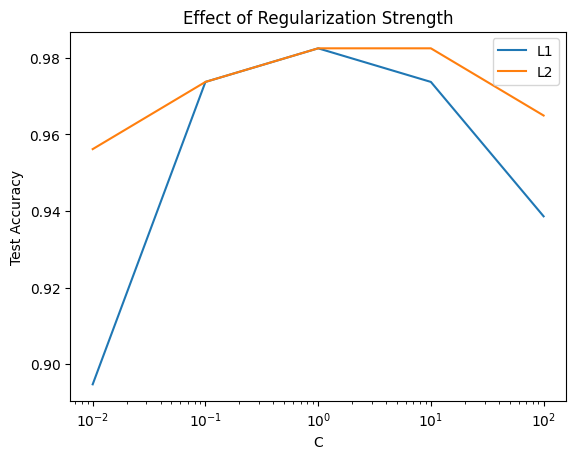

In [ ]:
Cs = [0.01, 0.1, 1, 10, 100]
acc_l1 = []
acc_l2 = []

for c in Cs:
    model_l1 = LogisticRegression(penalty="l1", C=c, solver="liblinear", max_iter=10000)
    model_l2 = LogisticRegression(penalty="l2", C=c, solver="liblinear", max_iter=10000)

    model_l1.fit(X_train_scaled, y_train)
    model_l2.fit(X_train_scaled, y_train)

    acc_l1.append(accuracy_score(y_test, model_l1.predict(X_test_scaled)))
    acc_l2.append(accuracy_score(y_test, model_l2.predict(X_test_scaled)))

plt.figure()
plt.plot(Cs, acc_l1, label="L1")
plt.plot(Cs, acc_l2, label="L2")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Test Accuracy")
plt.title("Effect of Regularization Strength")
plt.legend()
plt.show()
